## 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara <br>bisnis untuk digunakan sebagai fitur clustering. Lakukan <br>feature engineering! (20 poin)

Langkah-langkah:
<br>a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur
clustering. Tulis alasan teman-teman memilih fitur tersebut.
<br>b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).
Untuk mempermudah kamu, yuk lihat resource di bawah ini:

- Topic Machine Learning Preparation - Feature Engineering

Karena versi 2 hasilnya kurang maksimal maka saya buat versi 3, alih alih menggunakan FLIGHT_COUNT, saya akan menggunakan AVG_INTERVAL sebagai Frequency diharapkan dapat menghasilkan hasil yang lebih baik.

<!-- Code Description
- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members -->



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'flight_cleaned.csv')

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15


In [4]:
# feature selection berdasarkan RFM
df = df[['SUM_YR_1', 'LAST_TO_END', 'AVG_INTERVAL']]
df.isnull().sum()


SUM_YR_1        0
LAST_TO_END     0
AVG_INTERVAL    0
dtype: int64

In [5]:
df.head()

,SUM_YR_1,LAST_TO_END,AVG_INTERVAL
0,239560.0,1,3.483254
1,163618.0,11,5.298507
2,116350.0,97,27.863636
3,124560.0,5,4.788079
4,112364.0,79,7.043956


In [6]:
df.describe()

,SUM_YR_1,LAST_TO_END,AVG_INTERVAL
count,58255.000000,58255.000000,58255.000000
mean,5366.827963,171.255309,67.937285
std,8103.595049,180.560120,77.449058
min,0.000000,1.000000,0.000000
25%,1016.000000,28.000000,23.700000
50%,2808.000000,104.000000,44.833333
75%,6591.500000,258.000000,82.000000
max,239560.000000,731.000000,728.000000


In [7]:
# save df mentah
df.to_csv(r'flight_Versi5_RAW', index=False)

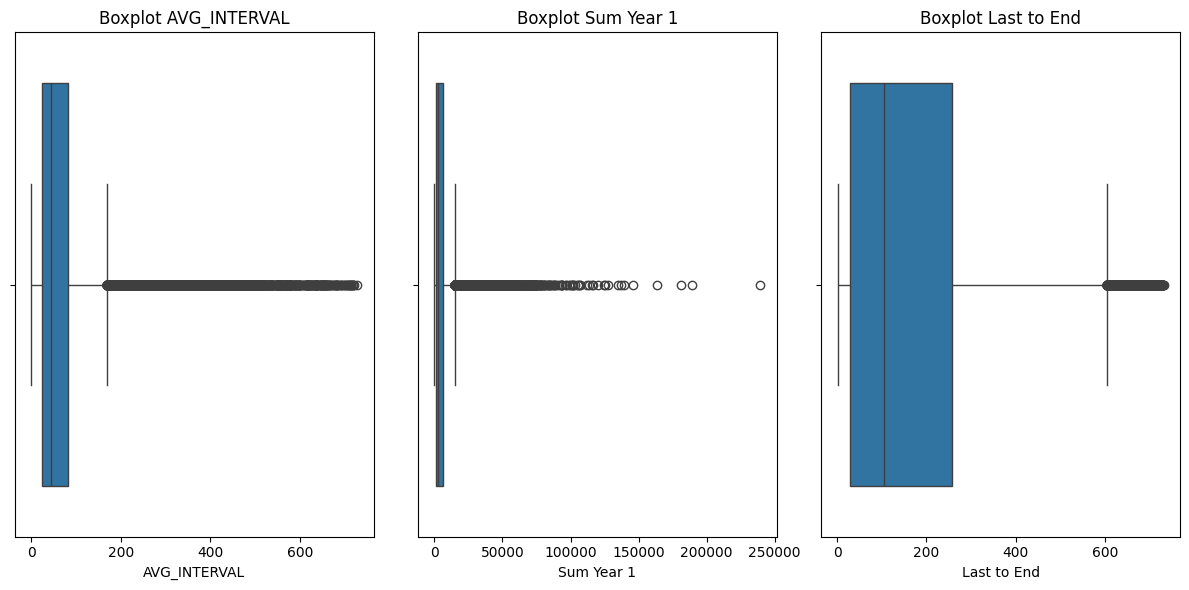

In [8]:


#buat boxplot untuk # fitur 'FLIGHT_COUNT', 'SUM_YR_1', dan 'LAST_TO_END' contohnya seperti dibawah
#boxplot untuk fitur monthlycharges dan total charges
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
# plt.title('Boxplot Monthly Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Monthly Charges')
# plt.subplot(1, 2, 2)
# sns.boxplot(x='Churn', y='TotalCharges', data=df)
# plt.title('Boxplot Total Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Total Charges')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='AVG_INTERVAL', data=df)
plt.title('Boxplot AVG_INTERVAL')
plt.xlabel('AVG_INTERVAL')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1', data=df)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='LAST_TO_END', data=df)
plt.title('Boxplot Last to End')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()

In [9]:
# IQR untuk membersihkan Outlier
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Menghapus outlier untuk setiap kolom
df_cleaned = df.copy()
df_cleaned = remove_outliers_iqr(df_cleaned, 'AVG_INTERVAL')
df_cleaned = remove_outliers_iqr(df_cleaned, 'SUM_YR_1')
df_cleaned = remove_outliers_iqr(df_cleaned, 'LAST_TO_END')




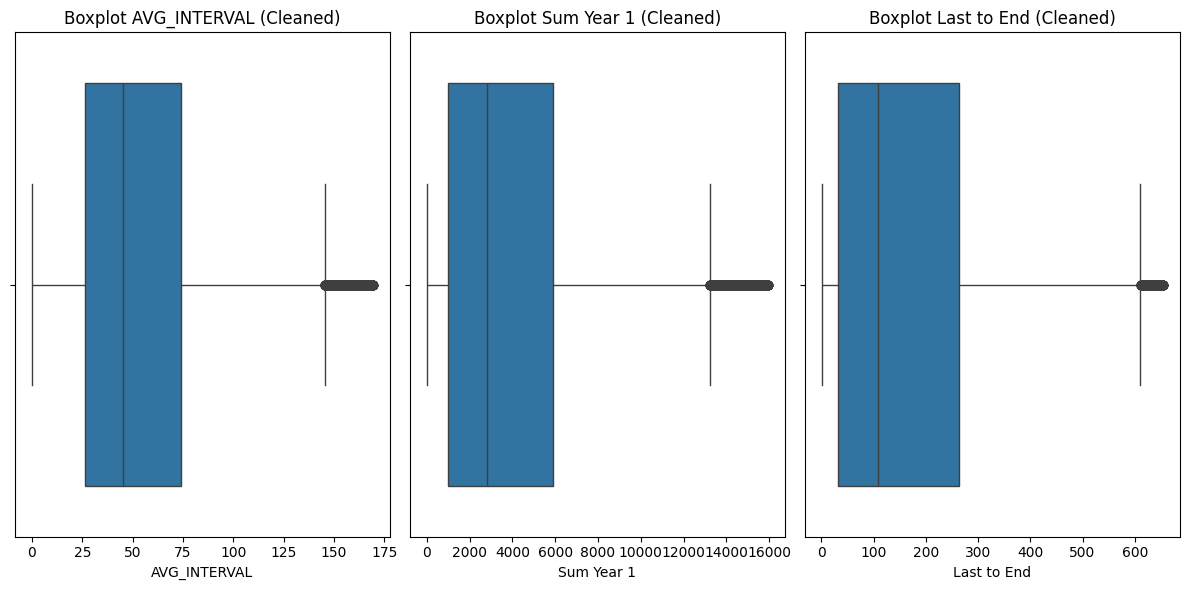

In [10]:
# Menampilkan boxplot setelah menghapus outlier
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='AVG_INTERVAL', data=df_cleaned)
plt.title('Boxplot AVG_INTERVAL (Cleaned)')
plt.xlabel('AVG_INTERVAL')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1', data=df_cleaned)
plt.title('Boxplot Sum Year 1 (Cleaned)')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='LAST_TO_END', data=df_cleaned)
plt.title('Boxplot Last to End (Cleaned)')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()

In [11]:
df_cleaned.head()

,SUM_YR_1,LAST_TO_END,AVG_INTERVAL
84,12500.0,53,32.000000
116,7444.0,23,25.882353
121,0.0,6,4.921875
126,3126.0,12,7.150000
181,14001.0,1,9.285714


In [12]:
# save df yang sudah dibersihkan dari outlier
df_cleaned.to_csv(r'flight_Versi5_NoOutlier.csv', index=False)

In [13]:
# scaling dengan menggunakan standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[['AVG_INTERVAL', 'SUM_YR_1', 'LAST_TO_END']] = scaler.fit_transform(
    df_cleaned[['AVG_INTERVAL', 'SUM_YR_1', 'LAST_TO_END']])
# save df yang sudah di scaling


In [14]:
df_scaled

,SUM_YR_1,LAST_TO_END,AVG_INTERVAL
84,2.264277,-0.684468,-0.579736
116,0.928944,-0.857778,-0.742002
121,-1.037080,-0.955987,-1.297966
126,-0.211477,-0.921325,-1.238866
181,2.660704,-0.984872,-1.182218
...,...,...,...
58250,-1.037080,1.533904,-1.428515
58251,-1.037080,0.725123,-1.322418
58252,-1.037080,-0.476495,-0.447114
58253,-1.037080,-0.823116,2.974530


In [15]:
df_scaled.to_csv(r'flight_Versi5_Mateng.csv', index=False)